In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [74]:
from google.colab import files 
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [75]:
company=pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [76]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])  
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])
label_encoder

LabelEncoder()

In [77]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [78]:
company.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                             
0         0     0      11         11      11           11          11     11   
                1      11         11      11           11          11     11   
          1     0      23         23      23           23          23     23   
                1      51         51      51           51          51     51   
1         0     0       6          6       6            6           6      6   
                1      22         22      22           22          22     22   
          1     0      18         18      18           18          18     18   
                1      39         39      39           39          39     39   
2         0     0      29         29      29           29          29     29   
                1      39         39      39           39          39     39   
          1     0      55         55      55           55          55     55   
                1      96         96      96           96          96     96   

                    Age  Education  
ShelveLoc Urban US                  
0         0     0    11         11  
                1    11         11  
          1     0    23         23  
                1    51         51  
1         0     0     6          6  
                1    22         22  
          1     0    18         18  
                1    39         39  
2         0     0    29         29  
                1    39         39  
          1     0    55         55  
                1    96         96

In [79]:
company.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US
0.00   139        24      0            358         185    2          79   15         0      0     1
8.65   123        76      18           218         120    2          29   14         0      1     1
8.75   143        77      25           448         156    2          43   17         1      1     1
8.74   155        80      0            237         124    2          37   14         1      0     1
8.73   129        76      16           58          121    2          69   12         1      1     1
                                                                                                 ..
6.01   131        29      11           335         127    0          33   12         1      1     1
5.99   117        42      10           371         121    0          26   14         1      1     1
5.98   124        56      11           447         134    2          53   12         0      1     1
5.97 

In [80]:
x=company.iloc[:,0:6]
y=company['ShelveLoc']

In [81]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [82]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [83]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [84]:
colnames=list(company)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [85]:
# Splitting data into training and testing data set
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [86]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [87]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

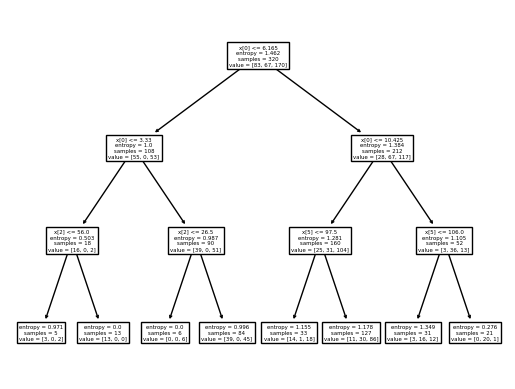

In [88]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

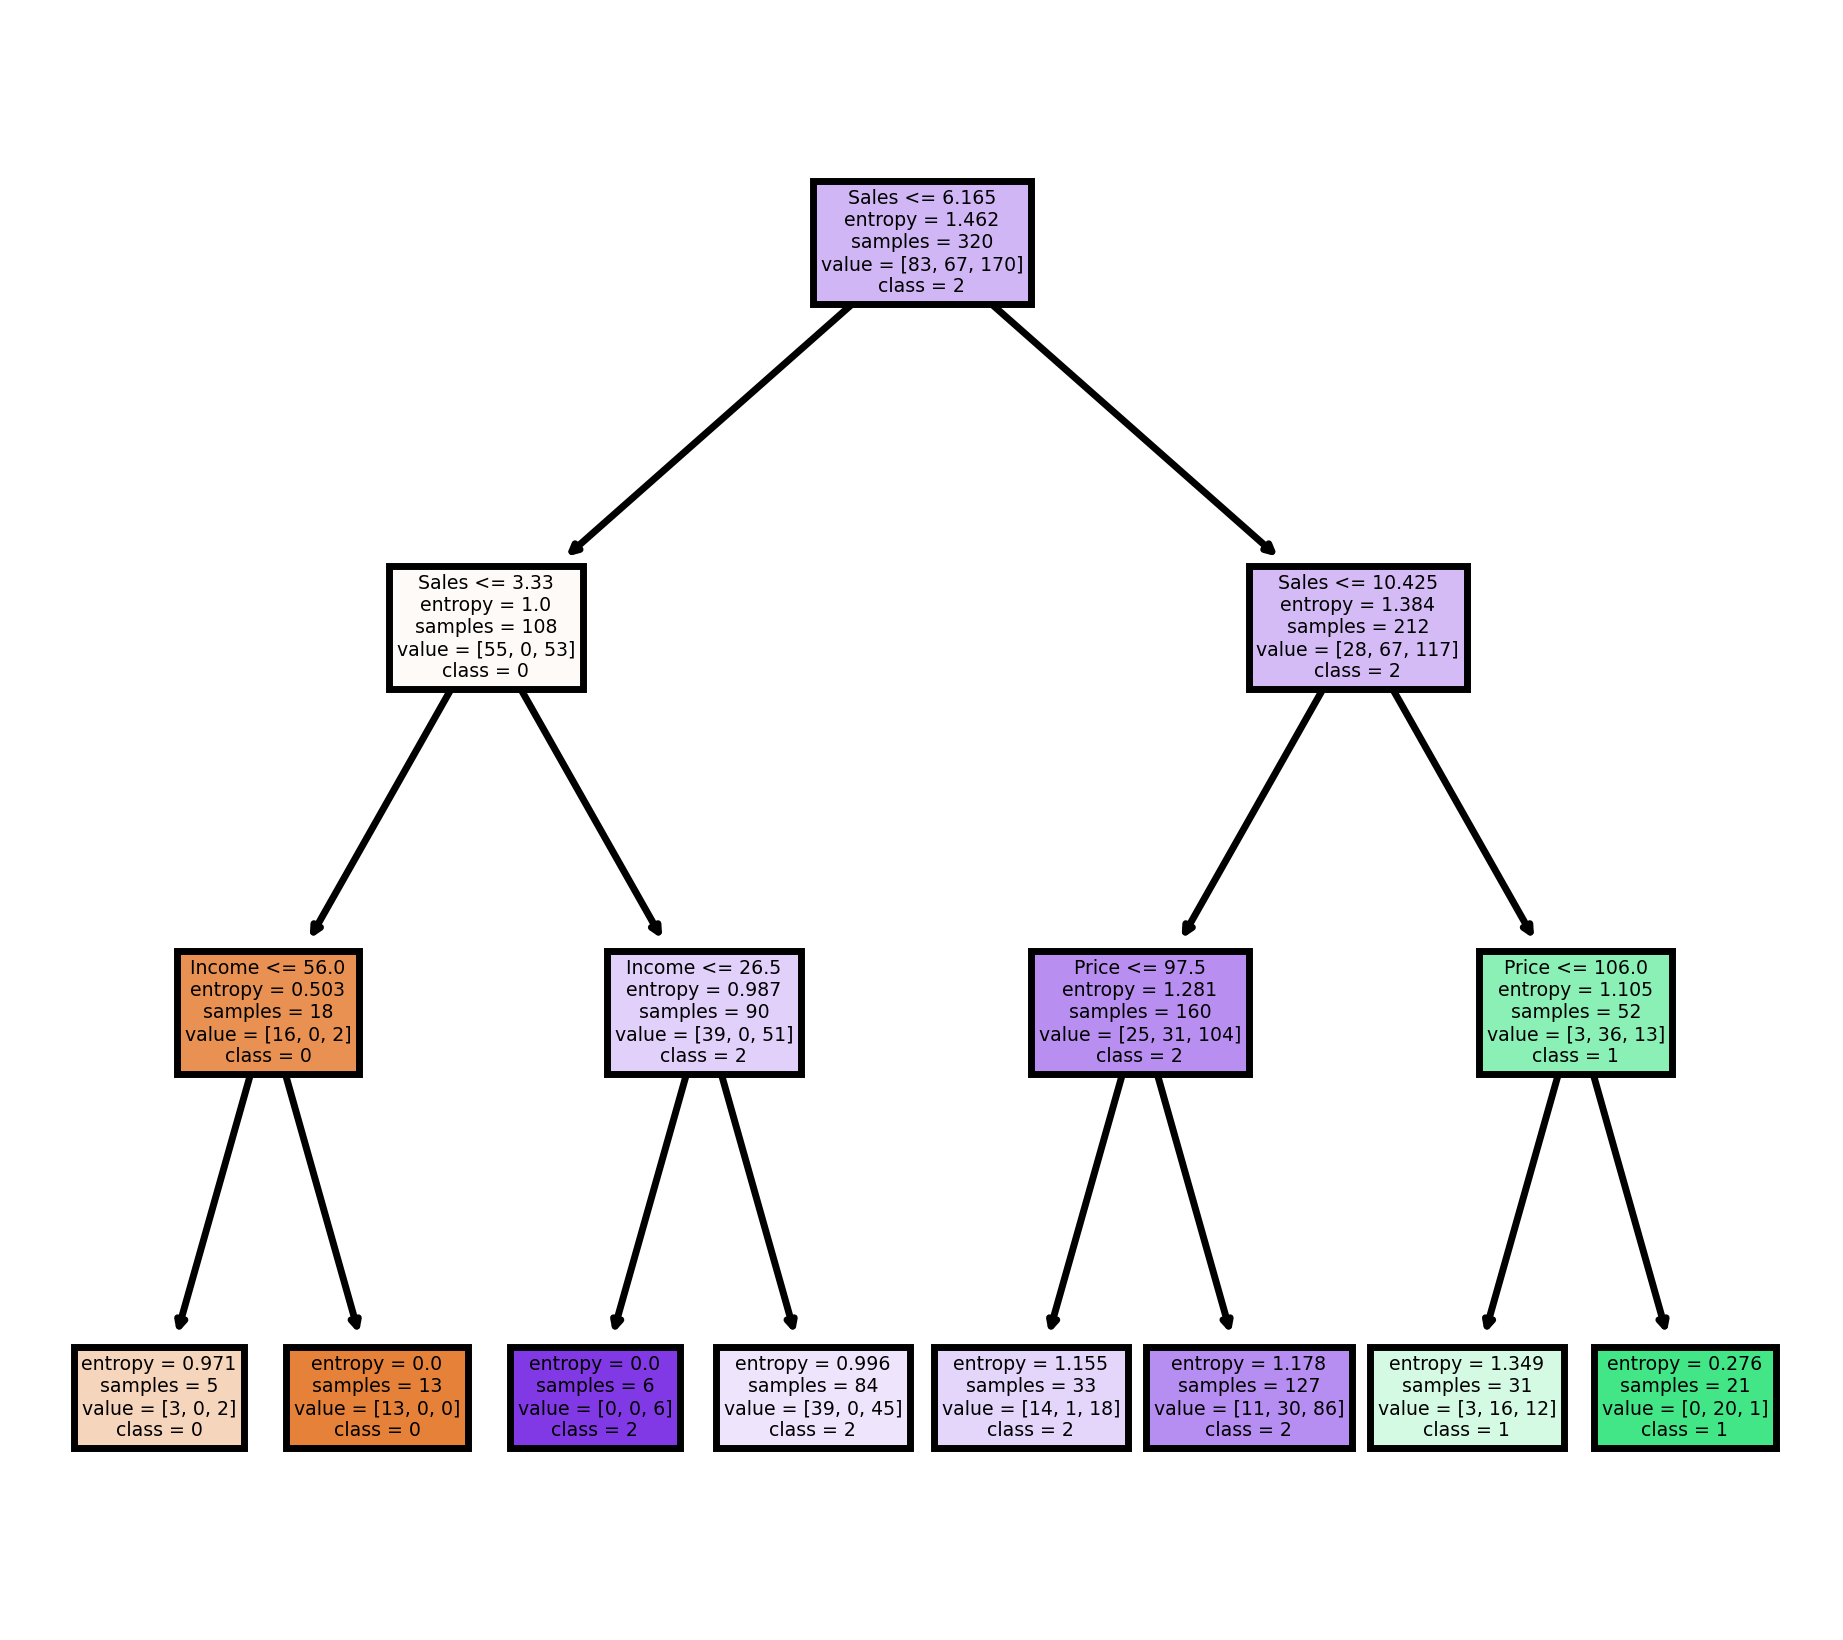

In [89]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education'] #.columns
cn=['0', '1', '2'] 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4.5,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [90]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    63
1    13
0     4
dtype: int64

In [91]:
y_test.value_counts()

2    49
1    18
0    13
Name: ShelveLoc, dtype: int64

In [92]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [93]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.625

In [94]:
np.mean(preds==y_test)

0.625

### Building Decision Tree Classifier (CART) using Gini Criteria

In [95]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [96]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [97]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

#### Decision Tree Regression Example

In [98]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [99]:
array =company.values
X = array[:,0:3]
y = array[:,3]

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

In [101]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [102]:
#Find the accuracy
model.score(X_test,y_test)

-1.2578929673889792

QUESTION2 Fraud Check 

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [104]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [105]:
fraud=pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [106]:

fr1=fraud.drop(['City.Population'],axis=1)
fr1


,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [107]:
fr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [108]:
fr1.copy()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [109]:

fr1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience',
       'Urban'],
      dtype='object')

In [110]:
fraud.shape

(600, 6)

In [111]:
#creating x and y datasets
x=fr1.drop(['Taxable.Income'],axis=1)

In [112]:
x.columns

Index(['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban'], dtype='object')

In [113]:
x.head()

,Undergrad,Marital.Status,Work.Experience,Urban
0,NO,Single,10,YES
1,YES,Divorced,18,YES
2,NO,Married,30,YES
3,YES,Single,15,YES
4,NO,Married,28,NO


In [114]:
#converting strings to numeric values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
x['Undergrad'] = label_encoder.fit_transform(x['Undergrad'])
x['Marital.Status'] = label_encoder.fit_transform(x['Marital.Status'])
x['Urban'] = label_encoder.fit_transform(x['Urban'])

In [115]:
x.head(4)

,Undergrad,Marital.Status,Work.Experience,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1


In [116]:
y=fr1[['Taxable.Income']]

In [117]:
y.head()

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002


In [118]:
y['Taxinc']=['risky' if x<=30000 else 'good' for x in y['Taxable.Income']]
y['Taxinc']

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxinc, Length: 600, dtype: object

In [119]:
y=y.drop(['Taxable.Income'],axis=1)
y

,Taxinc
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


In [120]:
y.head(201)

,Taxinc
0,good
1,good
2,good
3,good
4,good
...,...
196,risky
197,good
198,good
199,risky


In [121]:
Y=y['Taxinc'].value_counts()
Y

good     476
risky    124
Name: Taxinc, dtype: int64

In [122]:
#splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

Building Decison Tree using entropy criteria


In [123]:
model3_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model3_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

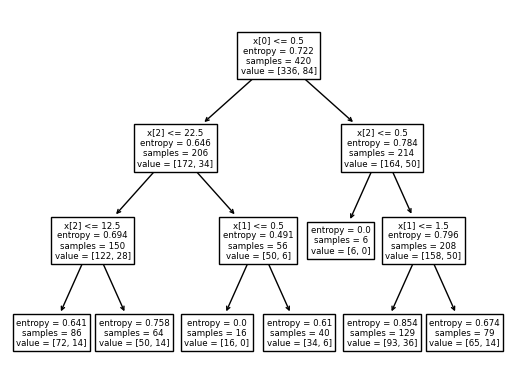

In [124]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model3_entropy);


[Text(0.5416666666666666, 0.875, 'Undergrad <= 0.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]'),
 Text(0.3333333333333333, 0.625, 'Work.Experience <= 22.5\nentropy = 0.646\nsamples = 206\nvalue = [172, 34]'),
 Text(0.16666666666666666, 0.375, 'Work.Experience <= 12.5\nentropy = 0.694\nsamples = 150\nvalue = [122, 28]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.641\nsamples = 86\nvalue = [72, 14]'),
 Text(0.25, 0.125, 'entropy = 0.758\nsamples = 64\nvalue = [50, 14]'),
 Text(0.5, 0.375, 'Marital.Status <= 0.5\nentropy = 0.491\nsamples = 56\nvalue = [50, 6]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.61\nsamples = 40\nvalue = [34, 6]'),
 Text(0.75, 0.625, 'Work.Experience <= 0.5\nentropy = 0.784\nsamples = 214\nvalue = [164, 50]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8333333333333334, 0.375, 'Marital.Status <= 1.5\nentropy = 0.796\nsampl

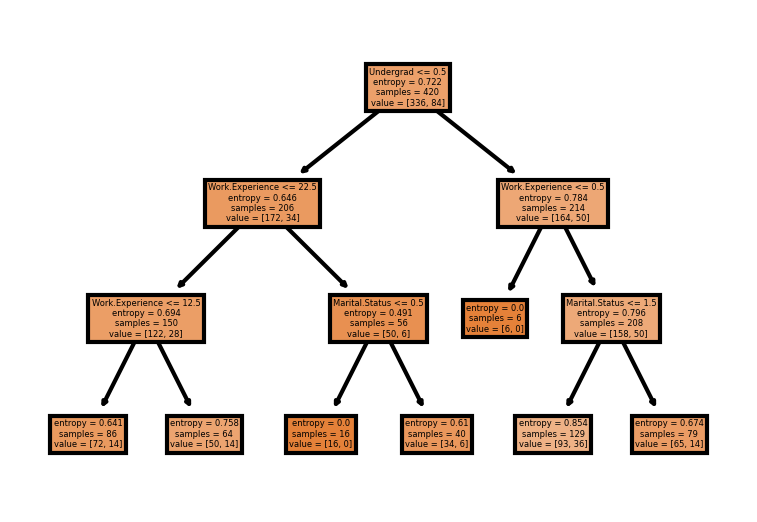

In [125]:
fn=['Undergrad','Marital.Status','Work.Experience','Urban']
cn=['good','risky']
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,2), dpi=300)
tree.plot_tree(model3_entropy,
               feature_names=fn,
              # class_names=cn,
               filled=True)

In [126]:
y_test

,Taxinc
159,good
307,good
253,good
528,good
137,risky
...,...
221,good
390,good
530,good
232,risky


Building Decion Tree using gini 


In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [128]:
model2_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
model2_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [129]:
model2_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

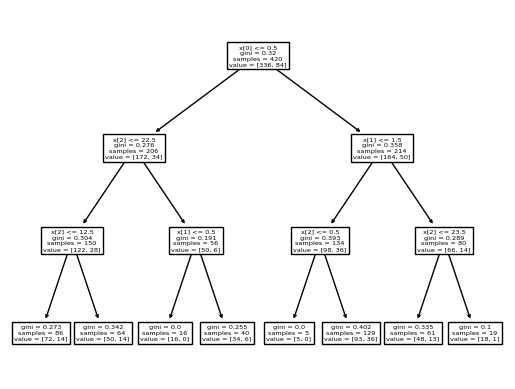

In [130]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model2_gini);

[Text(0.5, 0.875, 'Undergrad <= 0.5\ngini = 0.32\nsamples = 420\nvalue = [336, 84]\nclass = 0'),
 Text(0.25, 0.625, 'taxinc <= 22.5\ngini = 0.276\nsamples = 206\nvalue = [172, 34]\nclass = 0'),
 Text(0.125, 0.375, 'taxinc <= 12.5\ngini = 0.304\nsamples = 150\nvalue = [122, 28]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.273\nsamples = 86\nvalue = [72, 14]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.342\nsamples = 64\nvalue = [50, 14]\nclass = 0'),
 Text(0.375, 0.375, 'experience <= 0.5\ngini = 0.191\nsamples = 56\nvalue = [50, 6]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.255\nsamples = 40\nvalue = [34, 6]\nclass = 0'),
 Text(0.75, 0.625, 'experience <= 1.5\ngini = 0.358\nsamples = 214\nvalue = [164, 50]\nclass = 0'),
 Text(0.625, 0.375, 'taxinc <= 0.5\ngini = 0.393\nsamples = 134\nvalue = [98, 36]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.6875, 0.12

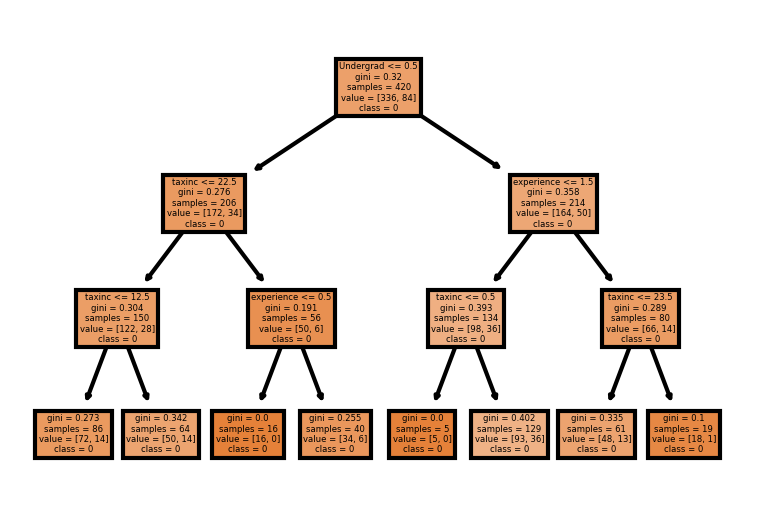

In [131]:
fn=['Undergrad','experience','taxinc','Marital.Status','Work.Experience','Urban']
cn=['0','1']
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,2), dpi=300)
tree.plot_tree(model2_gini,
               feature_names=fn,
              class_names=cn,
               filled=True)

In [132]:
y_test3 = y_test.to_numpy()
y_test3 = np.reshape(y_test3,180)
y_test3

array(['good', 'good', 'good', 'good', 'risky', 'risky', 'good', 'risky',
       'risky', 'good', 'good', 'risky', 'risky', 'good', 'risky',
       'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky',
       'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky',
       'good', 'good', 'good', 'risky', 'risky', 'risky', 'good', 'good',
       'good', 'good', 'risky', 'risky', 'good', 'good', 'good', 'risky',
       'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky',
       'good', 'good', 'good', 'good', 'good', 'risky', 'ris

In [133]:
#Predicting on test data
pred = model3_entropy.predict(x_test) # predicting on test data set 
#Prediction and computing the accuracy
pred=model3_entropy.predict(x_test)
np.mean(pred==y_test3)



0.7777777777777778

In [134]:
y_test.value_counts()

Taxinc
good      140
risky      40
dtype: int64

In [135]:
pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

In [136]:
pd.crosstab(y_test3,pred) # getting the 2 way table to understand the correct and wrong predictions

col_0,good
row_0,
good,140
risky,40


In [137]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test3,pred)

0.7777777777777778